In [6]:
### For each experimental run
data_dir = './Data/Gen50Run0/'

In [268]:
from os import listdir

In [283]:
filenames = [[], [], [], []]

for f in listdir(data_dir):
    if '' in f:
        if 'disconn' in f:
            filenames[3].append(data_dir+f)
        else:
            filenames[2].append(data_dir+f)
    else:
        if 'disconn' in f:
            filenames[1].append(data_dir+f)
        else:
            filenames[0].append(data_dir+f)

In [284]:
filenames

[['./Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen3.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen28.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen14.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0.exp',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_final.genome',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen15.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen29.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen2.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen0.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen17.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen16.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen1.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen5.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen12.dat',
  './Data/Gen50Run0/.DS_Store',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen13.dat',
  './Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen4.dat',
 

In [330]:
def get_run_data(files):
    dfs = []
    for f in files:
        if '.dat' in f:
            current = pd.read_csv(f)
            current['gen'] = int(f.split('.')[-2].split('Gen')[-1])
            dfs.append(current)
            
    return pd.concat(dfs)
   
def rearrange_columns(df, cond):
    if cond == 1 or cond == 3:
        n = 70
    elif cond == 2 or cond == 4:
        n = 66
    # also, correct columns
    col = df.columns.tolist()
    col = [col[-1]] + [col[0]] + [col[n]] + col[n+1:-1] + col[1:n]
    
    return df[col]

In [333]:
cond1 = rearrange_columns(get_run_data(filenames[0]), 1)
cond2 = rearrange_columns(get_run_data(filenames[1]), 2)
cond3 = rearrange_columns(get_run_data(filenames[2]), 3)
cond4 = rearrange_columns(get_run_data(filenames[3]), 4)

def get_fit_by_gen_plot(df):
    fit_by_gen = df.groupby(['gen'])[['total_fit']].mean().sort_index()
    fit_by_gen.plot()
    return fit_by_gen

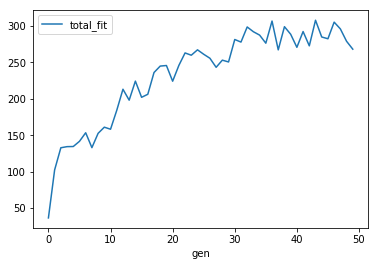

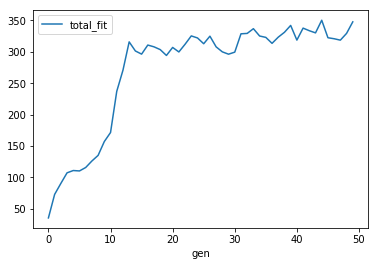

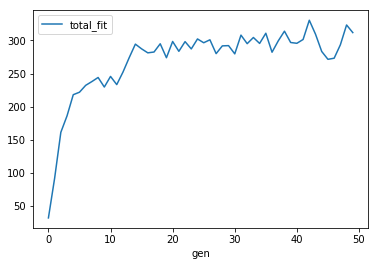

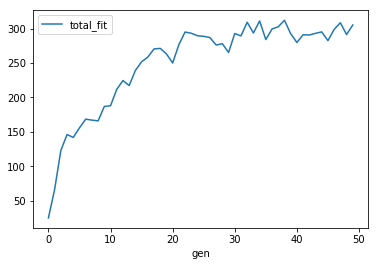

In [337]:
fbg1 = get_fit_by_gen_plot(cond1)
fbg2 = get_fit_by_gen_plot(cond2)
fbg3 = get_fit_by_gen_plot(cond3)
fbg4 = get_fit_by_gen_plot(cond4)

In [307]:
cond1[col]

,gen,pop,total_fit,trial_0_fit,trial_1_fit,trial_2_fit,trial_3_fit,trial_4_fit,trial_5_fit,trial_6_fit,...,locus_59,locus_60,locus_61,locus_62,locus_63,locus_64,locus_65,locus_66,locus_67,locus_68
0,3,0,135.183333,437.25,0.00,258.75,0.00,70.25,221.75,0.00,...,9,199,144,243,174,182,40,255,41,105
1,3,1,142.000000,148.00,30.25,112.00,81.75,276.00,0.00,137.50,...,9,199,144,243,174,182,40,255,41,105
2,3,2,241.233333,275.25,595.50,443.25,501.25,122.50,127.25,141.00,...,9,199,144,243,174,182,40,255,41,105
3,3,3,98.083333,0.00,0.00,372.75,110.00,0.00,3.25,30.25,...,9,203,144,243,174,182,40,255,135,105
4,3,4,147.466667,203.25,0.00,65.50,55.50,308.25,184.75,210.50,...,9,199,144,243,174,182,40,255,41,105
5,3,5,140.400000,0.00,0.00,341.75,0.00,443.00,175.25,231.00,...,170,84,185,36,249,85,170,211,194,202
6,3,6,22.783333,413.50,312.00,-407.00,52.25,-250.50,0.00,24.00,...,170,64,185,36,249,30,170,211,194,202
7,3,7,99.933333,167.25,0.00,7.00,49.00,192.00,104.50,-36.50,...,170,84,185,36,249,85,170,211,194,202
8,3,8,127.033333,234.25,287.75,87.00,0.00,161.25,22.50,65.00,...,170,84,185,36,249,85,170,211,194,202
9,3,9,119.783333,157.50,195.50,75.00,164.00,168.00,84.25,120.75,...,170,84,185,36,249,85,170,211,194,202


In [291]:
'./Data/Gen50Run0/2019_04_14_comm_cs_conn_Run0_Gen3.dat'.split('.')[-2].split('Gen')[-1]

'3'

In [35]:
from Trial import trial
from Controller import MN_controller
import pandas as pd

In [309]:
# works
def get_agents_data(trial):
    dfs = []
    col = ['IR_0', 'IR_1', 'IR_2', 'IR_3', 'IR_4', 'IR_5', 'IR_6', 'IR_7', 
           'comm_0', 'comm_1', 'comm_2', 'comm_3', 'ground', 
           'IR_0_activation', 'IR_1_activation', 'IR_2_activation', 'IR_3_activation', 
           'IR_4_activation', 'IR_5_activation', 'IR_6_activation', 'IR_7_activation',
           'comm_0_activation', 'comm_1_activation', 'comm_2_activation', 'comm_3_activation', 
           'ground_activation', 'comm_self_activation',
           'internal_1', 'internal_2', 'motor_left', 'motor_right', 'comm_unit'
          ]
    for a in trial.env.agents:
        df = pd.DataFrame()

        df['time'] = range(1001)
        
        for i in range(13):
            df[col[i]] = [0] + [d[i] for d in a.input_data]
            
        nodes = a.ann.nodes
        num = 13
        for n in nodes.keys():
            if nodes[n]['type'] == 'sensory':
                df[col[num]] = nodes[n]['activation']
                num += 1
            else:
                df[col[num]] = nodes[n]['activation'][1:]
                num += 1
            print(num)
        dfs.append(df)
    
    return dfs

In [ ]:
def get_genome(gen_df, pop):
    loci = [c for c in gen_df.columns if 'locus' in c]
    p = gen_df[gen_df['pop']==pop][loci].values.tolist()[0]
    return p

In [ ]:
def get_gen(file):
    return pd.read_csv(file)

In [56]:
cond1 = pd.read_csv(data_dir+'2019_04_14_comm_cs_conn_Run0_Gen49.dat')

In [57]:
cond1.sort_values(by='total_fit', ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'total_fit']]

,pop,locus_0,locus_1,locus_2,total_fit
7,7,248,50,192,396.766667
23,23,248,50,192,374.766667
9,9,248,50,192,369.816667
41,41,248,50,192,367.666667
27,27,248,50,192,363.383333
33,33,248,58,192,353.633333
36,36,248,50,192,353.350000
30,30,248,50,192,352.250000
28,28,211,50,192,352.233333
29,29,248,50,192,348.633333


In [28]:
cond3 = pd.read_csv(data_dir+'2019_04_14_no_comm_cs_conn_Run0_Gen49.dat')

In [30]:
cond3.sort_values(by='total_fit', ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'total_fit']]

,pop,locus_0,locus_1,locus_2,total_fit
23,23,243,157,239,523.333333
43,43,243,157,239,485.150000
35,35,243,157,239,467.883333
38,38,243,157,239,454.816667
16,16,243,157,239,447.000000
2,2,243,157,239,422.683333
47,47,243,157,239,416.933333
17,17,243,157,239,416.833333
20,20,243,157,239,412.300000
9,9,243,157,239,412.183333


In [31]:
cond3.iloc[23]

pop              23.000000
locus_0         243.000000
locus_1         157.000000
locus_2         239.000000
locus_3         245.000000
locus_4          33.000000
locus_5          91.000000
locus_6         194.000000
locus_7         164.000000
locus_8         210.000000
locus_9           7.000000
locus_10        153.000000
locus_11        208.000000
locus_12        249.000000
locus_13        186.000000
locus_14        223.000000
locus_15         69.000000
locus_16         95.000000
locus_17        215.000000
locus_18        237.000000
locus_19        204.000000
locus_20        134.000000
locus_21        233.000000
locus_22        216.000000
locus_23        249.000000
locus_24        132.000000
locus_25         72.000000
locus_26        146.000000
locus_27        154.000000
locus_28        177.000000
                   ...    
locus_55        218.000000
locus_56        212.000000
locus_57        203.000000
locus_58          0.000000
locus_59        170.000000
locus_60         84.000000
l

In [120]:
cond2 = pd.read_csv(data_dir+'2019_04_14_comm_cs_disconn_Run0_Gen49.dat')
cond4 = pd.read_csv(data_dir+'2019_04_14_no_comm_cs_disconn_Run0_Gen49.dat')


In [121]:
cond2.sort_values(by='total_fit', ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'total_fit']]

,pop,locus_0,locus_1,locus_2,total_fit
30,30,155,138,44,457.933333
10,10,209,138,44,430.400000
39,39,155,138,44,429.166667
13,13,155,138,44,427.250000
43,43,134,138,35,419.750000
34,34,155,138,44,419.316667
37,37,155,138,44,417.800000
28,28,155,138,44,412.866667
0,0,155,138,45,409.800000
46,46,155,138,44,405.333333


In [122]:
cond4.sort_values(by='total_fit', ascending=False)[['pop', 'locus_0', 'locus_1', 'locus_2', 'total_fit']]

,pop,locus_0,locus_1,locus_2,total_fit
35,35,15,23,3,427.183333
3,3,15,134,3,399.050000
24,24,15,134,3,397.066667
9,9,15,134,3,396.883333
7,7,15,134,3,393.033333
4,4,15,134,3,388.483333
16,16,15,134,3,387.866667
19,19,15,134,3,387.650000
46,46,15,134,3,383.650000
29,29,15,134,3,363.133333


In [32]:
def get_genome(gen_df, pop):
    loci = [c for c in gen_df.columns if 'locus' in c]
    p = gen_df[gen_df['pop']==pop][loci].values.tolist()[0]
    return p

In [58]:
g = get_genome(cond1, 7)
print(g)
len(g)

[248, 50, 192, 150, 172, 84, 17, 223, 120, 84, 176, 105, 133, 12, 150, 230, 78, 186, 37, 98, 240, 149, 188, 143, 16, 38, 157, 203, 21, 174, 141, 114, 95, 23, 118, 239, 183, 65, 151, 69, 113, 14, 105, 195, 21, 28, 181, 185, 246, 151, 248, 5, 245, 141, 32, 109, 247, 89, 56, 9, 199, 144, 217, 158, 182, 40, 81, 20, 105]


69

In [78]:
ann = MN_controller(genome=g)
t = trial(ann, comm_disabled=False)

In [84]:
t.run()
print(t.fitness)

415.5


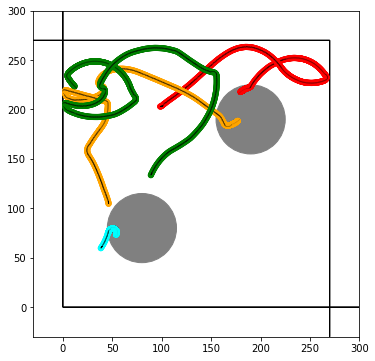

In [85]:
t.show()

In [101]:
import pickle
from Animate import animate
import datetime



In [109]:
time = datetime.datetime.now()
time_str = time.strftime("%Y/%m/%d_%H:%M:%S")


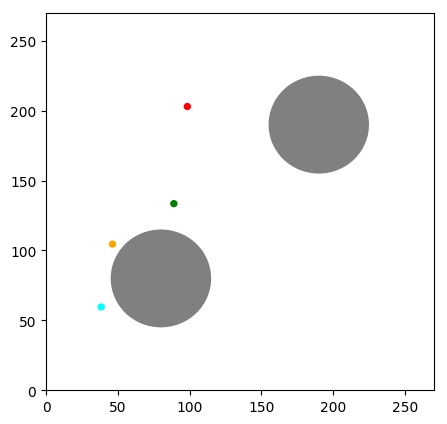

In [111]:
pickle.dump(t, open('good_comm.trial', 'wb'))
animate(t, 'good_comm.trial')

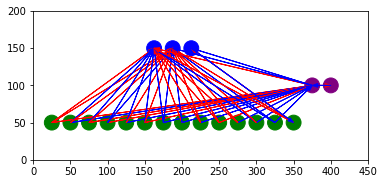

In [118]:
t.ann.show()

In [119]:
t.env.agents[3].input_data

[[0, 0, 0, 0, 0, 0, 0, 0, 0.9880117158748744, 0, 0.9880117158748744, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9878719853951444, 0, 0.987979907431832, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9995500972102834, 0, 0.999553867464947, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996156694360276, 0, 0.9996183195962558, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996338566880041, 0, 0.9996356463117603, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996353050656269, 0, 0.9996366139709624, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996355577830306, 0, 0.999636737211885, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996357975710409, 0, 0.9996367783843427, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996360572709411, 0, 0.9996368010599346, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996362780329505, 0, 0.9996368145790612, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996362231026533, 0, 0.9996368227303238, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.9996364140093581, 0, 0.9996368276684053, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.999636549605922, 0, 0.9996368306769745, 0, 0],
 [0, 0, 0, 0, 0,

In [123]:
g2 = get_genome(cond2, 30)
ann2 = MN_controller(g2, comm_self_connected=False)
t2 = trial(ann2)

In [127]:
def test_fitness(gen_df, pop, cond):
    g = get_genome(gen_df, pop)
    print(len(g))
    print(g)
    if cond == 1:
        ann = MN_controller(g, comm_self_connected=True)
        t = trial(ann, comm_disabled=False)
    elif cond == 2:
        ann = MN_controller(g, comm_self_connected=False)
        t = trial(ann, comm_disabled=False)
    elif cond == 3:
        ann = MN_controller(g, comm_self_connected=True)
        t = trial(ann, comm_disabled=True)
    elif cond == 4:
        ann = MN_controller(g, comm_self_connected=False)
        t = trial(ann, comm_disabled=True)

    total = []
    for i in range(10):
        t.run()
        total.append(t.fitness)

    print(sum(total)/10)
    print(total)
    return total

In [128]:
test_fitness(cond2, 30, 2)

65
[155, 138, 44, 8, 0, 242, 223, 34, 221, 95, 57, 143, 247, 69, 10, 24, 197, 166, 93, 140, 225, 240, 74, 9, 5, 121, 68, 132, 101, 165, 49, 201, 39, 21, 205, 95, 14, 120, 85, 82, 216, 60, 59, 137, 215, 94, 2, 60, 194, 133, 18, 137, 200, 137, 96, 220, 172, 68, 231, 30, 58, 214, 148, 215, 85]
372.775
[245.75, 244.0, 446.25, 240.25, 506.0, 414.25, 269.0, 516.0, 497.75, 348.5]


[245.75, 244.0, 446.25, 240.25, 506.0, 414.25, 269.0, 516.0, 497.75, 348.5]

In [132]:
t2.run()
print(t2.fitness)

412.0


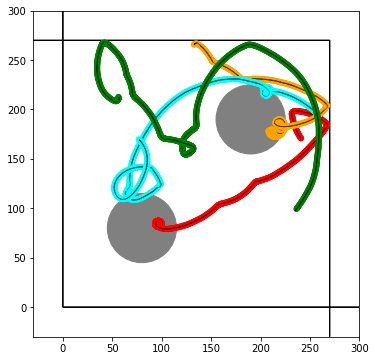

In [133]:
t2.show()

In [137]:
comm = []
for i in range(4):
    comm.append([d[2] for d in t2.env.agents[i].output_data])
    

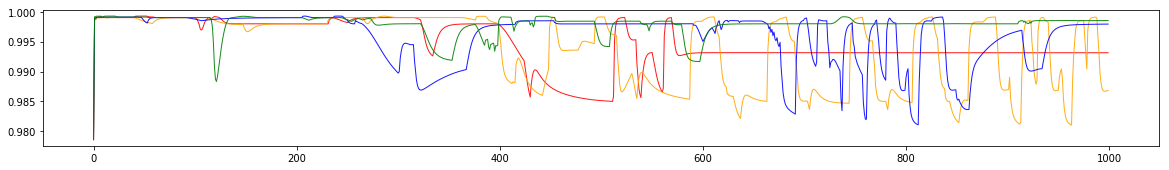

In [162]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1000), 'y1': comm[0], 'y2': comm[1], 'y3': comm[2], 'y4': comm[3]})
 
num=0
palette = ['red', 'orange', 'blue', 'green']

fig, ax = plt.subplots(figsize=(20, 2.5))

for column in df.drop('x', axis=1):
    plt.plot(df['x'], df[column], marker='', color=palette[num], linewidth=1, alpha=0.9, label=column)
    num+=1


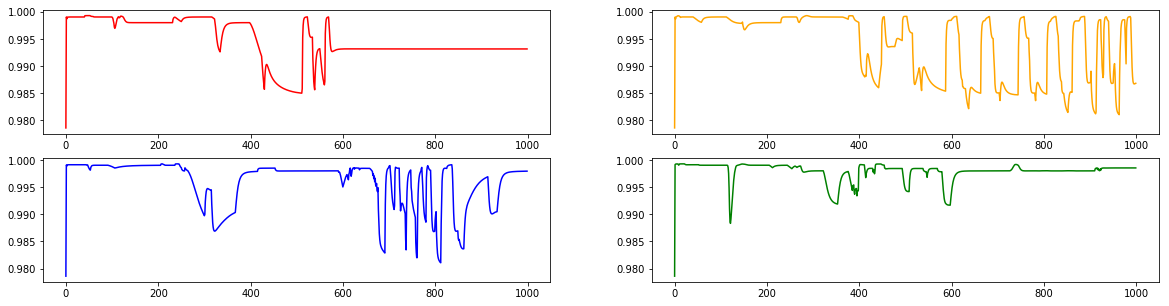

In [150]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
plt.subplot(221)
plt.plot(range(1000), comm[0], color='red')

plt.subplot(222)
plt.plot(range(1000), comm[1], color='orange')

plt.subplot(223)
plt.plot(range(1000), comm[2], color='blue')

plt.subplot(224)
plt.plot(range(1000), comm[3], color='green')

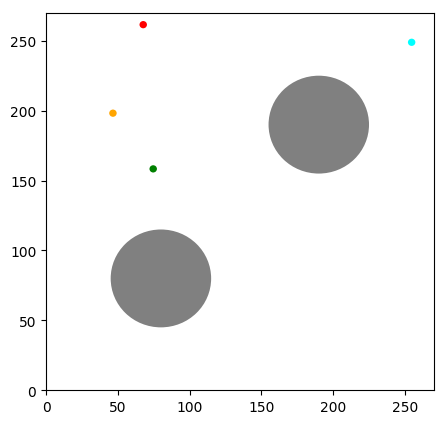

In [131]:
pickle.dump(t2, open('good_comm_ncs.trial', 'wb'))
animate(t2, 'good_comm_ncs.trial')

In [227]:
# works
def get_agents_data(trial):
    dfs = []
    col = ['IR_0', 'IR_1', 'IR_2', 'IR_3', 'IR_4', 'IR_5', 'IR_6', 'IR_7', 
           'comm_0', 'comm_1', 'comm_2', 'comm_3', 'ground', 
           'IR_0_activation', 'IR_1_activation', 'IR_2_activation', 'IR_3_activation', 
           'IR_4_activation', 'IR_5_activation', 'IR_6_activation', 'IR_7_activation',
           'comm_0_activation', 'comm_1_activation', 'comm_2_activation', 'comm_3_activation', 
           'ground_activation', 'comm_self_activation',
           'internal_1', 'internal_2', 'motor_left', 'motor_right', 'comm_unit'
          ]
    for a in trial.env.agents:
        df = pd.DataFrame()

        df['time'] = range(1001)
        
        for i in range(13):
            df[col[i]] = [0] + [d[i] for d in a.input_data]
            
        nodes = a.ann.nodes
        num = 13
        for n in nodes.keys():
            if nodes[n]['type'] == 'sensory':
                df[col[num]] = nodes[n]['activation']
                num += 1
            else:
                df[col[num]] = nodes[n]['activation'][1:]
                num += 1
            print(num)
        dfs.append(df)
    
    return dfs

In [230]:
t.env.agents[0].input_data

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996317123325763, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9880117158748744, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9879737079252046, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9995537182498877, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996182376263898, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996356049739845, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.999636590435324, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996367237490217, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996367707252284, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996368121943621, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996368214499988, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996368270172593, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996368303809992, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996368324260364, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996368336799467, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9996368344575545, 0, 0],
 [0, 0, 0, 0, 0

In [266]:
t2.fitness

412.0

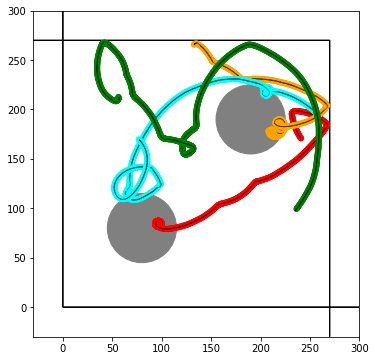

In [228]:
dfs = get_agents_data(t2)

14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


/Users/estherxu/.pyenv/versions/3.6.1/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


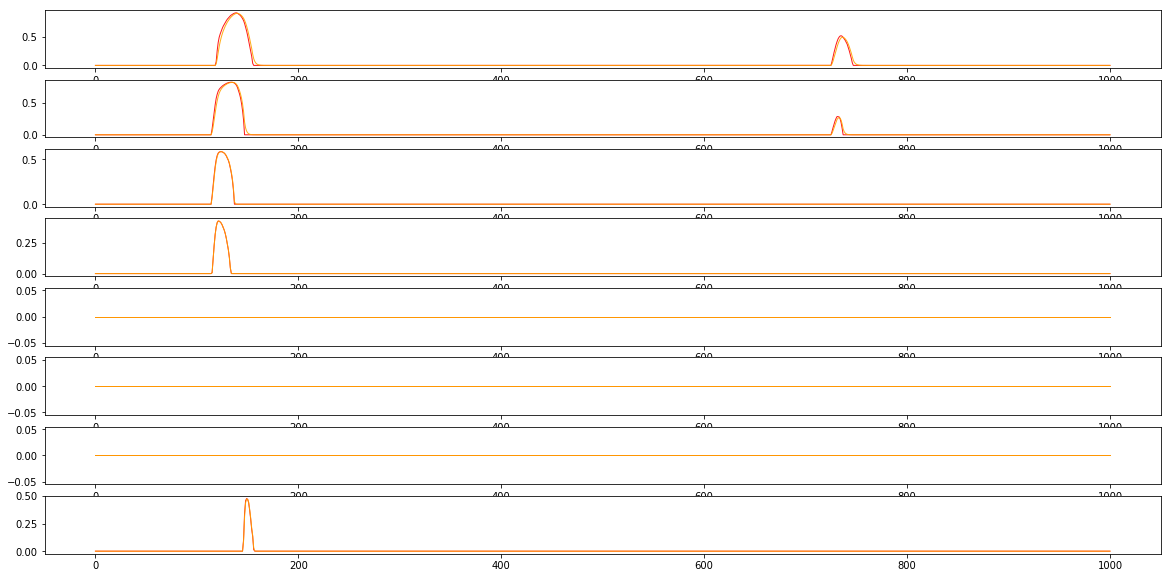

In [267]:
# Data 
num=0
palette = ['red', 'orange', 'blue', 'green']
col = ['IR_0', 'IR_1', 'IR_2', 'IR_3', 'IR_4', 'IR_5', 'IR_6', 'IR_7', 
       'comm_0', 'comm_1', 'comm_2', 'comm_3', 'ground', 
       'IR_0_activation', 'IR_1_activation', 'IR_2_activation', 'IR_3_activation', 
       'IR_4_activation', 'IR_5_activation', 'IR_6_activation', 'IR_7_activation',
       'comm_0_activation', 'comm_1_activation', 'comm_2_activation', 'comm_3_activation', 
       'ground_activation']

df = dfs[3]

fig, ax = plt.subplots(figsize=(20, 10))

n=0
for i in range(8):
    for column in [col[n], col[n+13]]:
        plt.subplot(int('81{}'.format(i+1)))
        plt.plot(df['time'], df[column], marker='', color=palette[num], linewidth=1, alpha=0.9, label=column)
        num+=1
    num = 0
    n += 1


In [178]:
print([t.ann.nodes[n]['type'] for n in t.ann.nodes.keys()])

['sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'sensory', 'internal', 'internal', 'motor', 'motor', 'motor']


In [177]:
t2.env.agents[0].ann.connections

{0: {'input': 0,
  'mode': 'sensor_to_internal',
  'output': 14,
  'weight': 4.411764705882353,
  'weight_locus': 21},
 1: {'input': 0,
  'mode': 'sensor_to_motor',
  'output': 16,
  'weight': -2.098039215686274,
  'weight_locus': 22},
 2: {'input': 0,
  'mode': 'sensor_to_motor',
  'output': 17,
  'weight': -4.647058823529412,
  'weight_locus': 23},
 3: {'input': 1,
  'mode': 'sensor_to_internal',
  'output': 14,
  'weight': -4.803921568627451,
  'weight_locus': 24},
 4: {'input': 1,
  'mode': 'sensor_to_motor',
  'output': 16,
  'weight': -0.2549019607843137,
  'weight_locus': 25},
 5: {'input': 1,
  'mode': 'sensor_to_motor',
  'output': 17,
  'weight': -2.3333333333333335,
  'weight_locus': 26},
 6: {'input': 2,
  'mode': 'sensor_to_internal',
  'output': 14,
  'weight': 0.17647058823529438,
  'weight_locus': 27},
 7: {'input': 2,
  'mode': 'sensor_to_motor',
  'output': 16,
  'weight': -1.03921568627451,
  'weight_locus': 28},
 8: {'input': 2,
  'mode': 'sensor_to_motor',
  'outpu